# CISC 440 — Artificial Intelligence  
## Homework 1 — Conceptual Foundations: Agents & Problem Representation

**Due:** *(see Canvas)*  
**Submission:** Upload this notebook to Canvas 
**Collaboration:** You may work with **one partner** (max 2 students). Submit one file with both names.

### What you will practice
- Core ideas of **intelligence** and **AI**
- **Agents** and **rationality**
- **PEAS** task environments and environment properties
- **Model Building**: random Agent, Reflex Agent and Model Based Agent

**Reading context:** AIMA Ch. 1–2.

## Name(s)
1.  Ethan Lukandwa
2.  Branden Shaffa

## Academic Integrity / Honor Code  
By placing my initials below, I affirm that I have completed all parts of this assignment in accordance with the academic integrity guidelines outlined in the course syllabus and course policies. Specifically, I confirm that:

1. I did not receive unauthorized assistance from anyone other than the course instructor (Prof. Akram).  
2. I did not provide unauthorized assistance to anyone else.  
3. I did not use AI tools, online solution sources, or any other external platform to generate or complete my answers.

**Time spent on the assignment (excluding reading):** _________ hours  

**My impression of the assignment (1 = lowest, 5 = highest):**  
- Difficulty (1–5): _________  
- Enjoyment  (1–5): _________  
- Usefulness (1–5): _________  
- Comments (optional):

**Initials:** _________  
## Time spent (excluding reading): _________ hours


## Homework — Conceptual Agents and Task Environments  
*(Aligned with AIMA Chapter 2)*


## Task 1 — PEAS Descriptions

For each of the following activities, provide a **PEAS description** of the task environment and characterize it in terms of its properties.

### a. Performing a Gymnastic Floor Routine

- **Performance Measure: the execution score and difficulty score. Also, if they are able to land safely.**  
- **Environment: There are judges, audience. There is also gravity, and the floor mat.**  
- **Actuators: The gymnast would use their amrs and legs**  
- **Sensors: Vision, and the sense of touch are the sensors, also hearing.**  


### b. Bidding on an Item at an Auction

- **Performance Measure: Winning the bid. Having the highest amount of money for the money.**  
- **Environment: Auctioneer, competitive bidders, bidding rules**  
- **Actuators: Submitting a bid, raising a bid, Passing or withdrawing**  
- **Sensors: Current highest bid, the time remaining, auction rules**  

## Task 2 — True / False with Justification  
*(10 points total: 5 + 5)*

For each of the following assertions, indicate whether it is **True** or **False**, and support your answer with **examples or counterexamples** where appropriate.

### a.  
It is possible for a given agent to be perfectly rational in two distinct task environments.

**Answer:**  
**Justification:**  

### b.  
Suppose we keep the agent program fixed but speed up the machine by a factor of two. Does that change the agent function?

**Answer:**  
**Justification:**  

## Task 3 — Agent Structure (Mini-Model)

In this part, you will **model an agent conceptually before writing any code**.  
This mirrors how AI problems are framed in **AIMA Chapter 2**, where the focus is on *agent behavior and decision-making* rather than implementation details.



### Scenario: Food Pantry Assistant Agent

A pantry assistant agent operates in a simplified food pantry setting focused on addressing **food insecurity**.

The agent can observe:
- current inventory levels
- number of households waiting for assistance
- whether a delivery has arrived

The agent can choose one of the following actions:
- `MOVE`
- `DELIVER`
- `WAIT`

### Q3.1 — PEAS Description 

Provide a **PEAS description** for the **Food Pantry Assistant Agent**.

Clearly identify:
- **Performance Measure**
- **Environment**
- **Actuators**
- **Sensors**

**Guidelines:**
- Focus on **decision quality**, not implementation
- Use **bullet points**
- Be concrete and specific to **food insecurity and resource allocation**

**Response:**
- **Performance Measure - Serve the maximum number of households with available food and prioritize households when demand exceeds supply**
- **Environment - Limited and fluctuating food inventory, number of households waiting.**
- **Actuators - Some actuators are to move locations, deliver food, and wait for changes in the environment.**
- **Sensors - Some sensors would be inventory levels changing, households waiting, and delivery arrival**
   


### Q3.2 — Agent Type (Conceptual)

What type of agent best describes the **Food Pantry Assistant**?

Choose **one** of the following and justify your choice briefly:
- Simple reflex agent
- Model-based reflex agent
- Goal-based agent
- Utility-based agent

Your justification should reference:
- what the agent **remembers** (or does not remember)
- whether the agent **plans**, **evaluates outcomes**, or reacts purely to percepts

**Response: The type of agent that the Food Pantry Assistant is would be a Utility-based agent because it evaluates tradeoffs between serving now vs conserving resources. It doesn't just react it chooses action based on expected impact.**



# Programming Part
## Food Box Delivery System (Using agents.py) 

You will create a tiny environment with two locations:

- Pantry (A) — where boxes are stored
- Household (B) — where boxes are delivered

### Percept (2 items only)

Each step, the agent perceives:

- carrying_box
- at_household

### Actions:

"MOVE"         # switch between A and B
"DELIVER_BOX"  # deliver if at B and carrying
"WAIT"         # do nothing


Simulation requirement (test set)

You must run:

1. 5 steps, then
2. add new deliveries (boxes + households), then
3. run 10 more steps

In [1]:
#imports do not change
from agents import Agent, Environment, RandomAgentProgram, TraceAgent, loc_A, loc_B

## Define the Environment (skeleton)
### Q4.1 — Implement FoodBoxDeliveryEnvironment

In this food box delivery world, there are two locations: the pantry (location A) and the household (location B). The pantry starts with a limited number of food boxes (pantry_stock), and there are one or more households at location B waiting to receive deliveries (households_waiting). The delivery agent can carry at most one food box at a time. An important rule of the environment is the auto-load behavior: if the agent is at the pantry, is not currently carrying a box, and there are food boxes available while households are still waiting, the agent will automatically pick up a box at the end of the step (this is handled by the environment through an exogenous change, not by an explicit agent action). The agent’s performance is evaluated using a simple scoring system: the agent earns +10 points for each successful food box delivery, but loses 1 point for action taken MOVE, DELIVER_BOX, and loses 2 point for action taken WAIT. This encourages the agent to deliver food efficiently while avoiding unnecessary actions.

Complete the class below.

Rules of the world
- There are pantry_stock food boxes available at location A
- There are households_waiting deliveries needed at location B
- The agent can carry at most 1 box

Auto-load rule (important):
 - If the agent is at A, not carrying a box, and pantry has stock, it automatically picks up a box at the end of the step (via exogenous_change())

Performance measure
- +10 for each successful delivery
- -1 for every action taken (MOVE / DELIVER_BOX)
- -2 for action taken WAIT

In [2]:
class FoodBoxDeliveryEnvironment(Environment):
    """
    Two-location food box delivery world:
      - loc_A: Pantry
      - loc_B: Household
    World state:
      - pantry_stock: number of boxes at Pantry (A)
      - households_waiting: number of households needing a box at Household (B)
      - delivered: count of successful deliveries so far
    Percept: (carrying_box, at_household)
    Actions: "MOVE", "DELIVER_BOX", "WAIT"

    Auto-load (exogenous_change):
      If an agent is at Pantry (A), not carrying a box, pantry has stock,
      and households are waiting, the agent automatically picks up a box.
    """

    ACTIONS = ("MOVE", "DELIVER_BOX", "WAIT")

    def __init__(self, pantry_stock=1, households_waiting=1):
        super().__init__()
        self.pantry_stock = int(pantry_stock)
        self.households_waiting = int(households_waiting)
        self.delivered = 0

    # --- required by agents.py Environment ---
    def percept(self, agent):
        """
        Ensure the agent has a carrying flag
        Return a 2-tuple percept:
          (carrying_box, at_household)
        """
        if not hasattr(agent, "carrying_box"):
            agent.carrying_box = False
        carrying_box = bool(agent.carrying_box)
        at_household = (agent.location == loc_B)
        return (carrying_box, at_household)

    def execute_action(self, agent, action):
        """
        Update the world and the agent based on the action.
        Must also update agent.performance.
        """
        #Check if agent is carrying flag
        if not hasattr(agent, "carrying_box"):
            agent.carrying_box = False

        
        #MOVE
        if action == "MOVE":
            if agent.location == loc_A:
                agent.location = loc_B
            else:
                agent.location = loc_A

            agent.performance -= 1

        #DELIVERY
        elif action == "DELIVER":
            agent.performance -= 1

            if(
                agent.location == loc_B
                and agent.carrying_box
                and self.households_waiting > 0
            ):
                agent.carrying_box = False
                self.households_waiting -= 1
                self.delivered += 1
                agent.performance += 10

        #WAIT
        elif action == "WAIT":
            agent.performance -= 2

        # TODO
        

        # Environment "background" dynamics (auto-load at pantry)
        self.exogenous_change()

    def default_location(self, thing):
        """
        Start the agent at Pantry (A).
        (Note: TrivialVacuumEnvironment uses default_location to place agents.) 
        """
        return loc_A
        
        # TODO
        pass

    def exogenous_change(self):
        """
        Auto-load rule:
        If an agent is at Pantry (A), not carrying a box, pantry has stock,
        and there are households waiting, the agent automatically picks up a box.
        """
        # Auto-load: any agent at A picks up a box if possible and needed
        for agent in self.agents:
            if not hasattr(agent, "carrying_box"):
                agent.carrying_box = False

            if (
                agent.location == loc_A
                and not agent.carrying_box
                and self.pantry_stock > 0
                and self.households_waiting > 0
            ):
                agent.carrying_box = True
                self.pantry_stock -= 1
        pass

    # --- helper method for the test set ---
    def add_requests(self, boxes, households):
        """
        Add new boxes and/or new waiting households mid-simulation.
        """
        self.pantry_stock += int(boxes)
        self.households_waiting += int(households)

    def is_done(self):
        """
        Stop when there is nothing left to deliver and no box is in transit.
        """
        # TODO
        any_in_transit = any(getattr(a, "carrying_box", False) for a in self.agents)
        return (self.households_waiting == 0 and not any_in_transit)


### Q4.2 — Create a Random Food Box Agent

Use RandomAgentProgram from agents.py to choose among the 3 actions. 

In [3]:

def RandomFoodBoxAgent():
    # TODO: return an Agent(...) that selects randomly from the environment actions
    program = RandomAgentProgram(FoodBoxDeliveryEnvironment.ACTIONS)
    return Agent(program)


### Q4.3 — Create a Simple Reflex Food Box Agent

Rules (percept-only):

- If carrying_box and at_household → "DELIVER_BOX"
- If carrying_box and not at_household → "MOVE"
- If not carrying and at_household → "MOVE" (go back to pantry)
- Otherwise → "WAIT" (stay at pantry and auto-load will happen)

In [4]:
def ReflexFoodBoxAgent():
    def program(percept):
        carrying_box, at_household = percept

        # TODO: implement reflex rules above
        if carrying_box and at_household:
            return "DELIVER_BOX"
        elif carrying_box and not at_household:
            return "MOVE"
        elif not carrying_box and at_household:
            return "MOVE"
        else:
            return "WAIT"

    return Agent(program)


### Q4.4 — Create a Model-Based Reflex Food Box Agent

Add one piece of memory:
- moved_last_step (True/False)
- Use it to prevent “MOVE, MOVE, MOVE…” when waiting would be smarter.

Suggested idea:
- initialize memory once (completed for you)
- If carrying, behave like reflex 
- If you are not carrying and at pantry, don’t keep moving—wait for auto-load.
- If you moved last step and still not carrying, wait one step.


In [7]:
def ModelBasedFoodBoxAgent():
    def program(percept):
        carrying_box, at_household = percept

        # Initialize memory once
        if program.state is None:
            program.state = {"moved_last_step": False}

        moved_last = program.state["moved_last_step"]

        # --- Carrying a box ---
        if carrying_box:
            if at_household:
                program.state["moved_last_step"] = False
                return "DELIVER_BOX"
            else:
                program.state["moved_last_step"] = True
                return "MOVE"

        # --- Not carrying ---
        if not carrying_box:
            if not at_household:
                # At pantry without box → WAIT for auto-load
                program.state["moved_last_step"] = False
                return "WAIT"
            else:
                # At household without box
                if moved_last:
                    # If we already moved and still don't have box → WAIT
                    program.state["moved_last_step"] = False
                    return "WAIT"
                else:
                    program.state["moved_last_step"] = True
                    return "MOVE"

    program.state = None
    return Agent(program)



This runs:

- 5 steps
- then adds new requests
- then runs 10 more steps

In [8]:
def run_two_phase_test(agent_factory, trace=True):
    env = FoodBoxDeliveryEnvironment(pantry_stock=1, households_waiting=2)

    agent = agent_factory()
    if trace:
        TraceAgent(agent)  # prints percept/action each step

    env.add_thing(agent)

    print("=== Phase 1: run 5 steps ===")
    env.run(steps=5)
    print("After phase 1:",
          "delivered =", env.delivered,
          "| pantry_stock =", env.pantry_stock,
          "| households_waiting =", env.households_waiting,
          "| agent_loc =", agent.location,
          "| carrying =", getattr(agent, "carrying_box", False),
          "| performance =", agent.performance)

    print("\n=== Add new requests: +2 boxes, +2 households ===")
    env.add_requests(boxes=2, households=2)
    print("Now:",
          "pantry_stock =", env.pantry_stock,
          "| households_waiting =", env.households_waiting)

    print("\n=== Phase 2: run 10 steps ===")
    env.run(steps=10)
    print("After phase 2:",
          "delivered =", env.delivered,
          "| pantry_stock =", env.pantry_stock,
          "| households_waiting =", env.households_waiting,
          "| agent_loc =", agent.location,
          "| carrying =", getattr(agent, "carrying_box", False),
          "| performance =", agent.performance)

    return env, agent

In [9]:
# Random agent (may or may not deliver efficiently)
#run_two_phase_test(RandomFoodBoxAgent, trace=True)


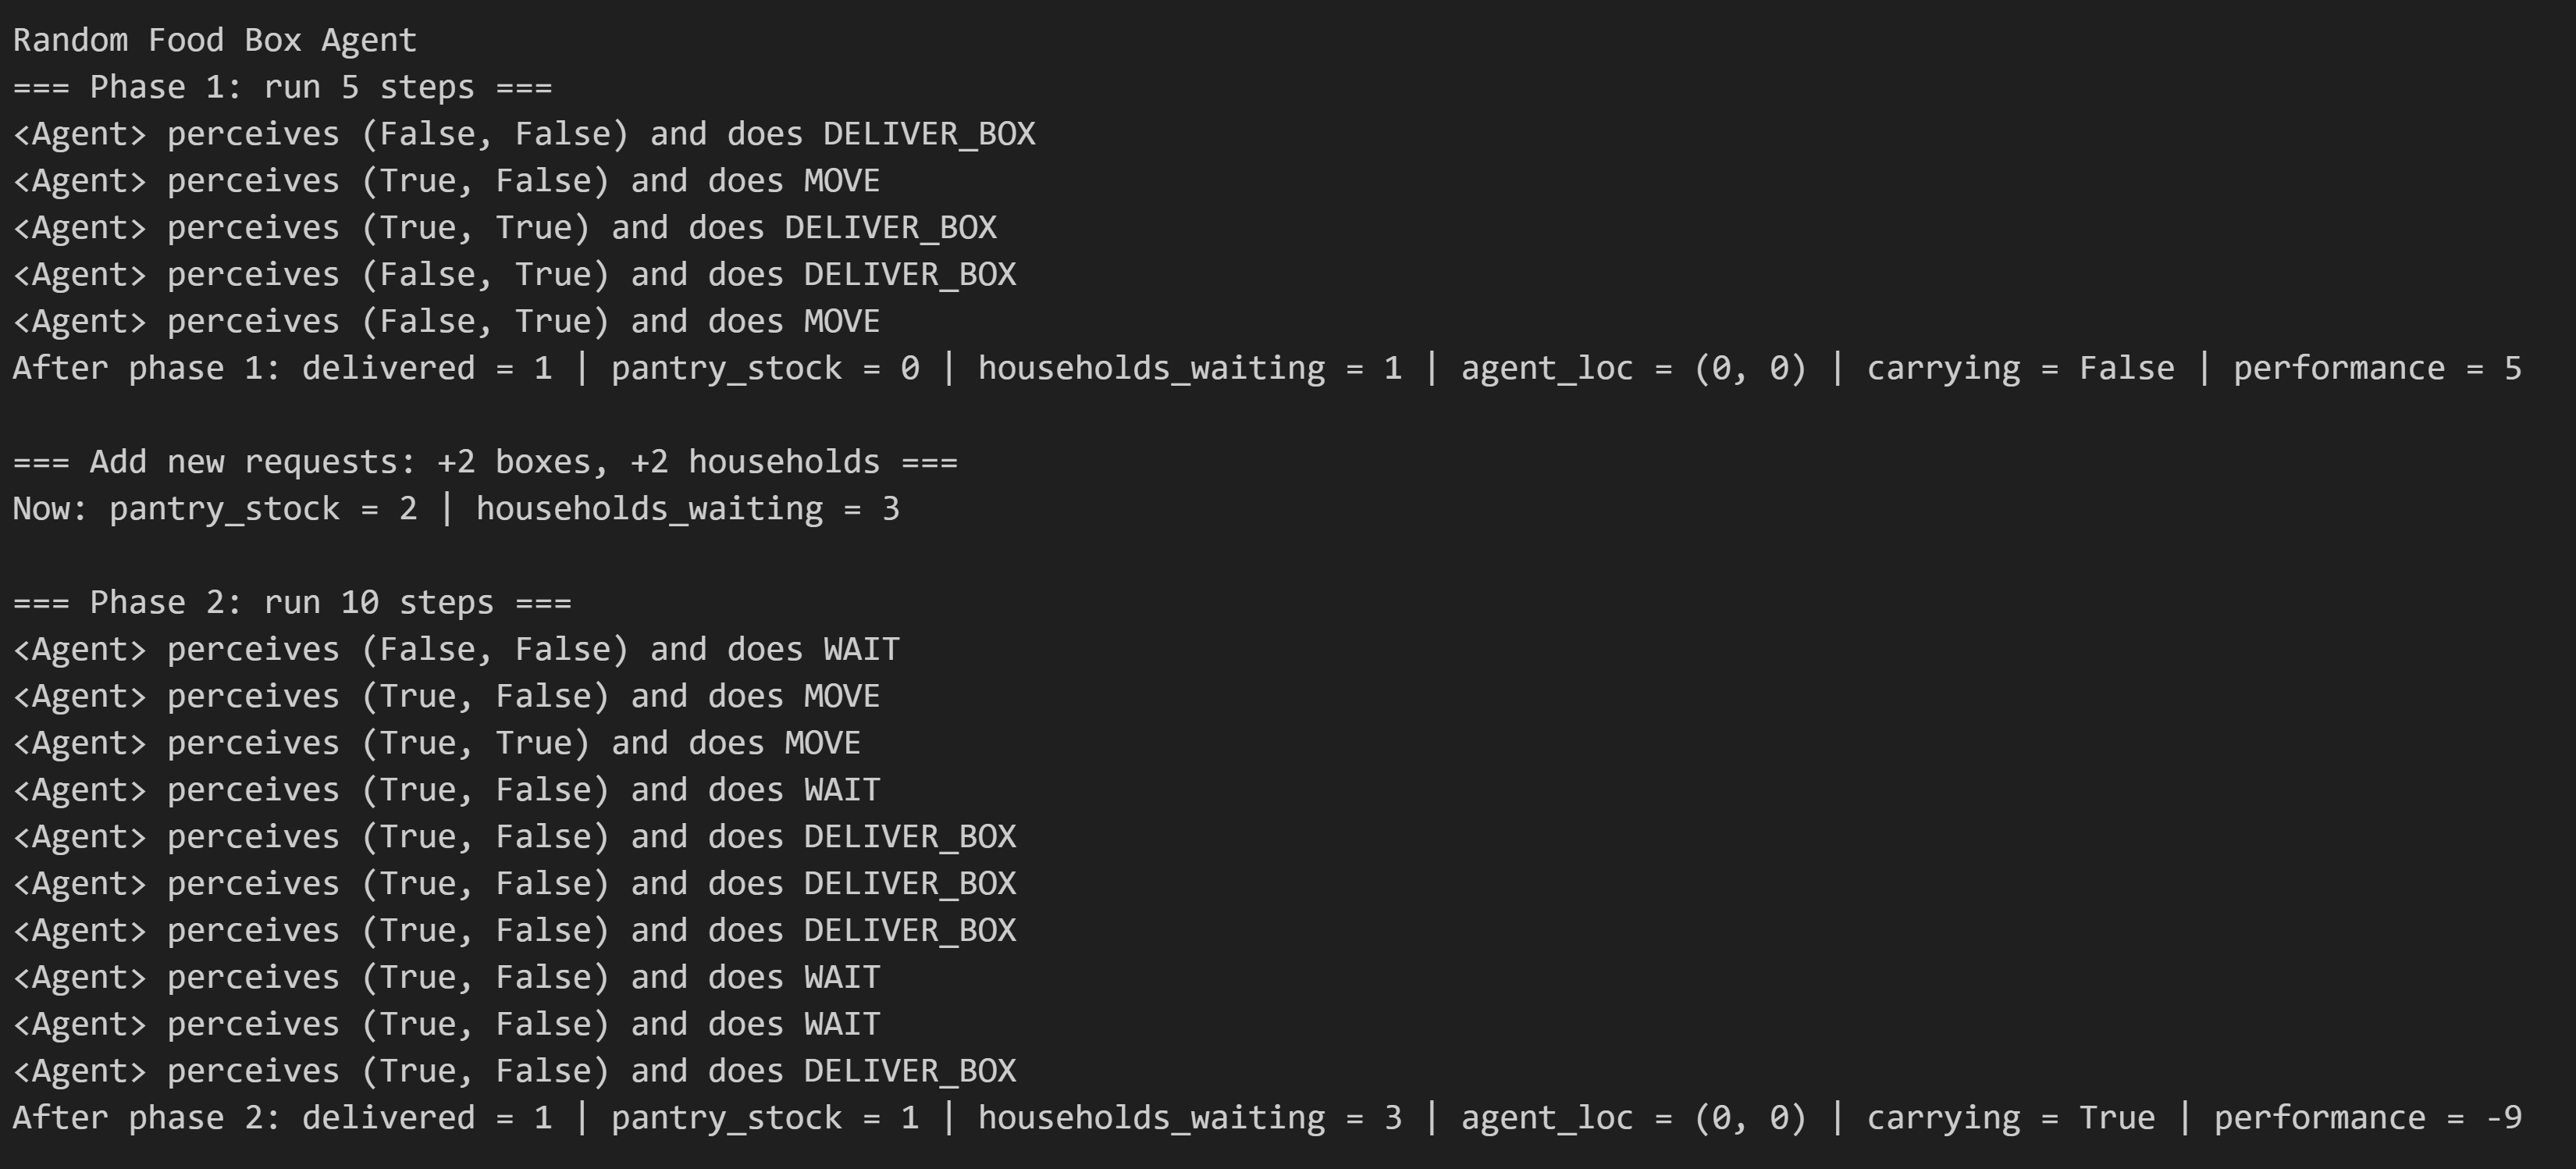

In [10]:
# Simple reflex agent (should deliver reliably)
#run_two_phase_test(ReflexFoodBoxAgent, trace=True)


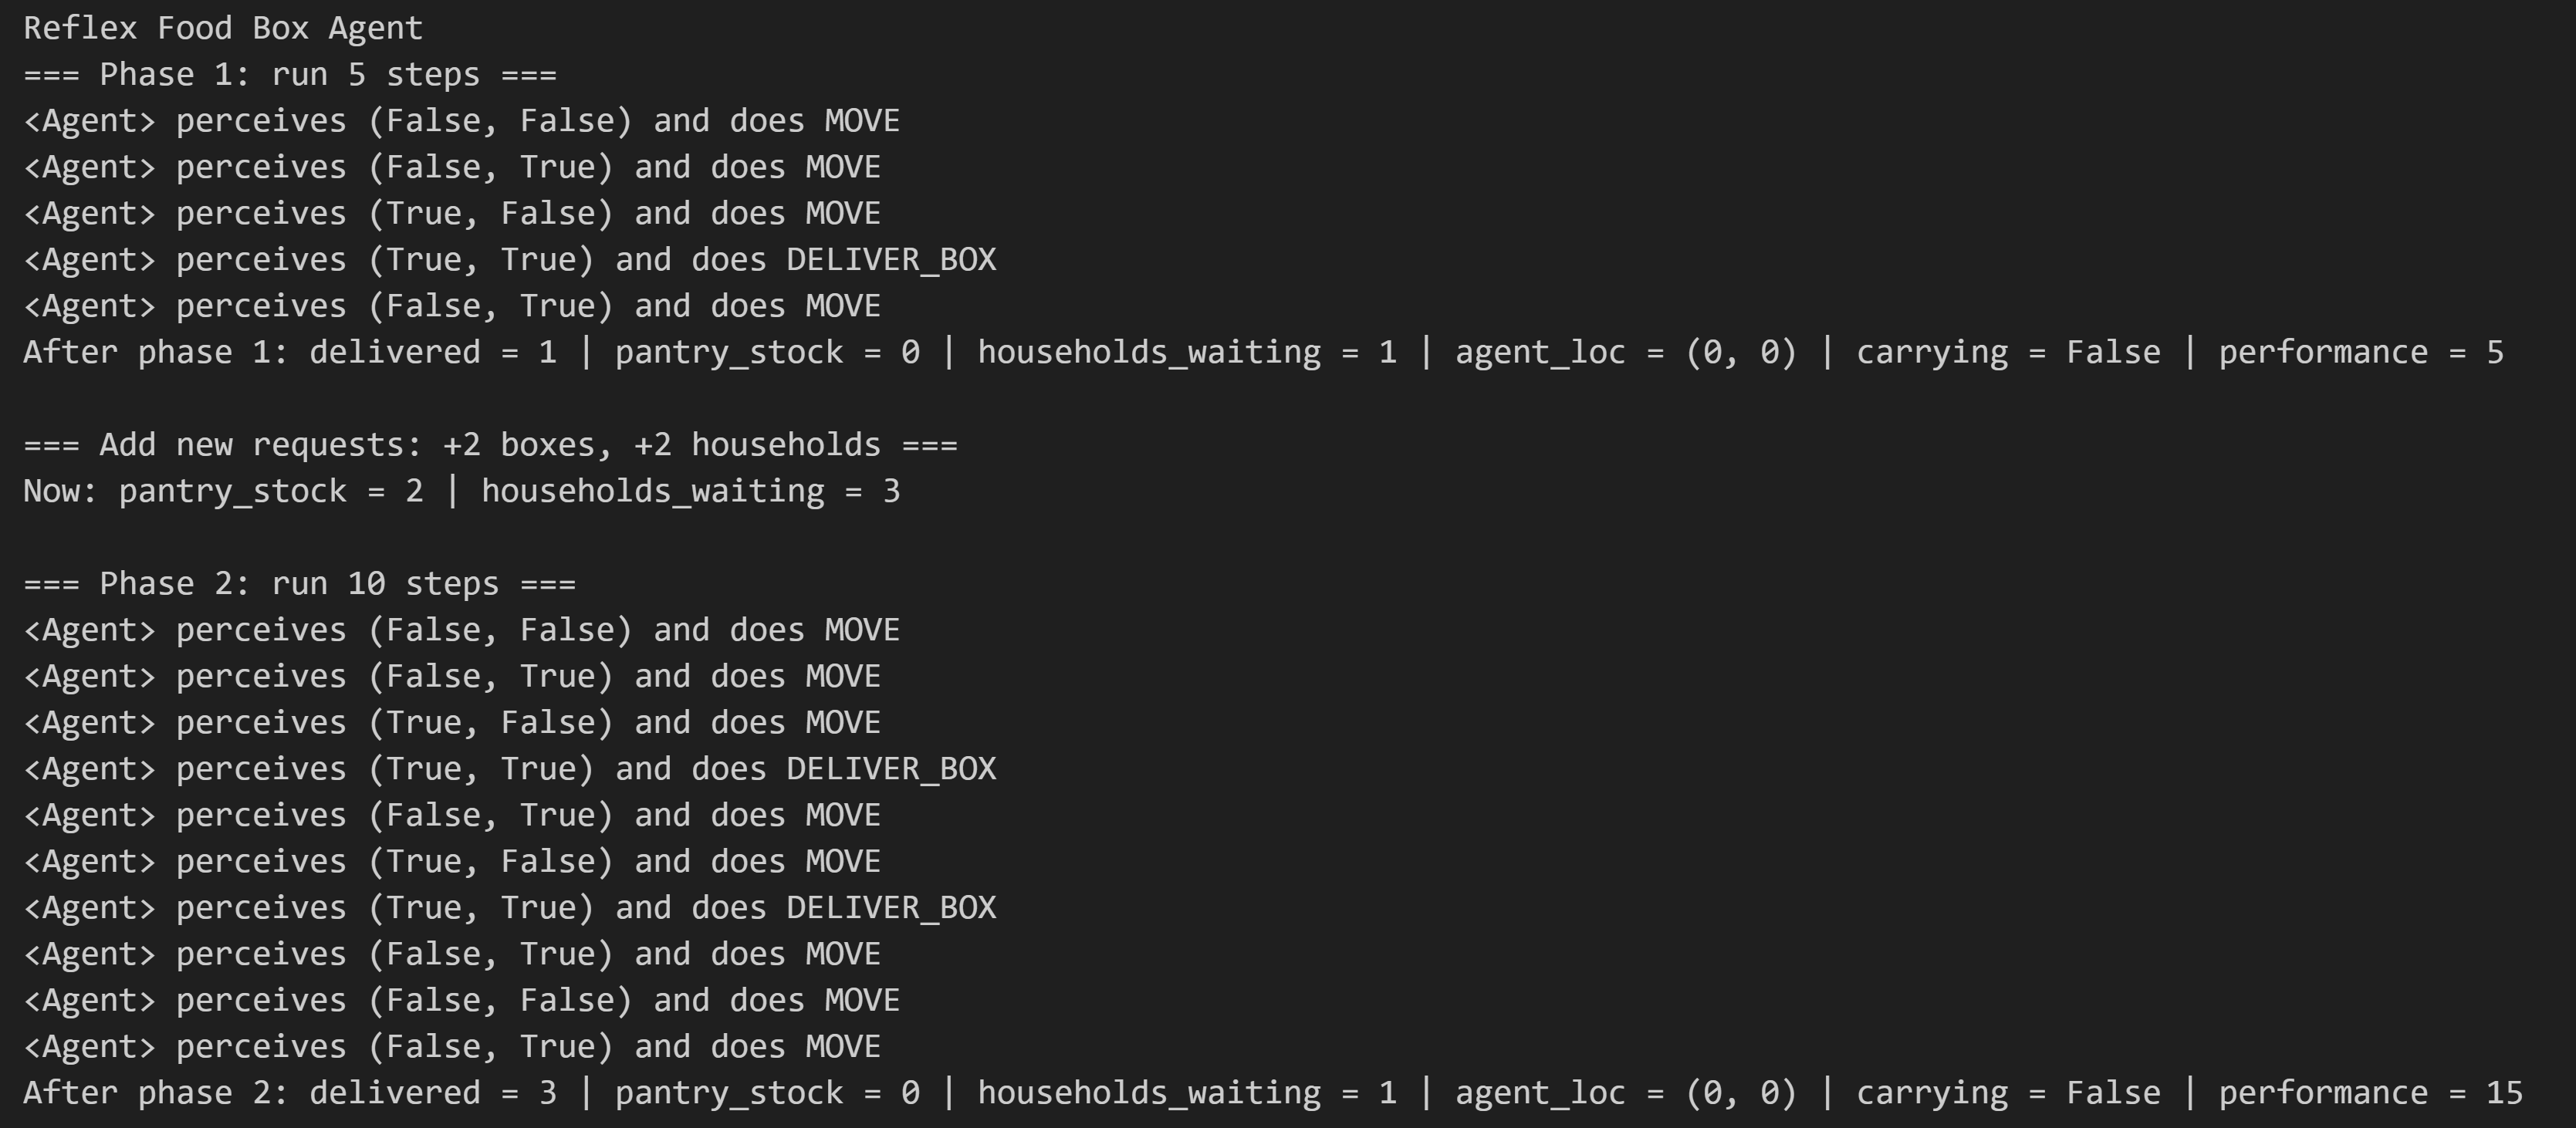

In [11]:
# Model-based agent (should avoid unnecessary moves better than reflex in this tiny world)
#run_two_phase_test(ModelBasedFoodBoxAgent, trace=True)

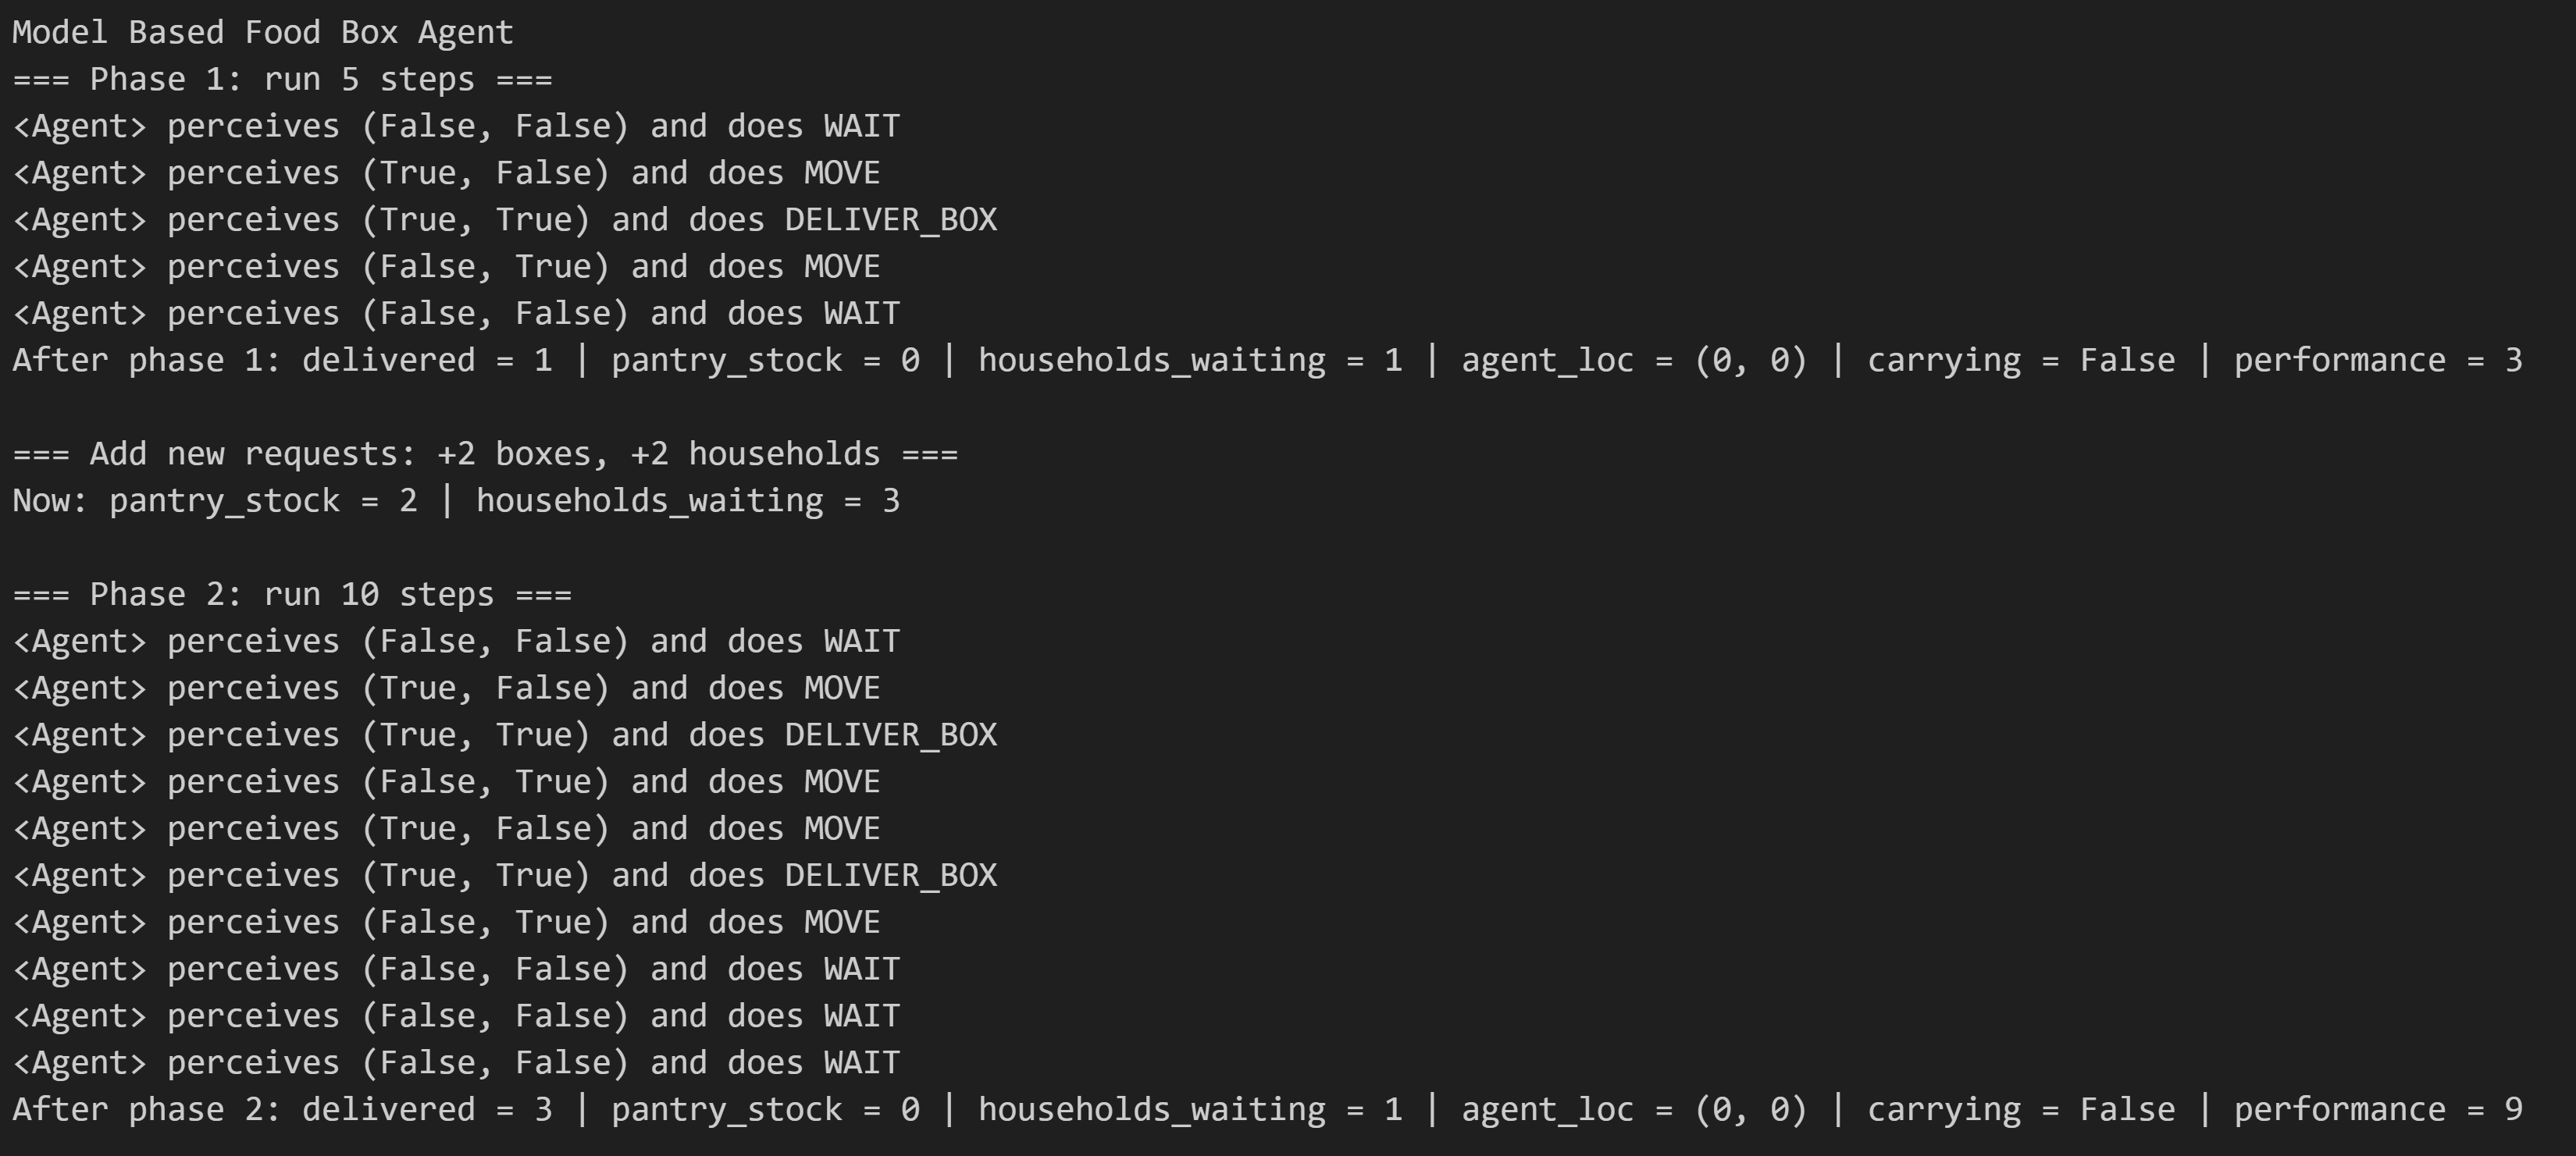